In [1]:
# CHENGZHI DONG
# ID 112890166
# CSE 353 
# Assignment 7

In [2]:
# (a). Implement and apply the linear support vector machine onto the given dataset to obtain the (𝒘, 𝑏).
# Note: use the quadprog() function in Matlab/Python to solve the Quadratic Programming optimization 
# problem.
# (b). Identify which training samples in the dataset are support vectors.
# (c). Compute the largest margin you achieved from your SVM.
# (d). Visualize the training data, highlight the support vectors, plot the decision boundary line and the 
# two lines along the support vectors.

In [3]:
# Import python libraries
import numpy as np
import matplotlib.pyplot as plt
from qpsolvers import solve_qp

# Uncomment to install quadprog
# !pip install quadprog
# !pip install qpsolvers

In [4]:
# File name
x_file = "X_LinearSeparable.txt"
y_file = "Y_LinearSeparable.txt"

# Load data into matrix
x_data = np.loadtxt(x_file, delimiter = ',') 
y_data = np.loadtxt(y_file)

# Data size
x_dimension = len(x_data)
sample_size = len(y_data)


In [5]:
# Find the support vectors
def getSupportVector(W, B, X, Y):
    
    # List of support vectors
    supportVectors = []
    
    # Define an error bound for y( wT x + b) = 1
    errorBound = 0.00001
    
    # Loop the data samples to find support vectors
    for n in range(len(Y)):
        
        # Calculate the dot product wTx
        wTx = 0
        for d in range(len(X)):
            wTx += W[d]*X[d][n]
            
        # Determine whether x[n] is a support vector or not
        # If it is, then append to the list of support vectors
        if abs(Y[n]*(wTx + B) - 1 ) < errorBound:
            supportVectors.append([X[0][n],X[1][n]])
            
    # Return the list of support vectors
    return supportVectors

In [6]:
def Visualization(W, B, X, Y, title):
     
    # Create positive and negative arrays for x0 and x1 for plotting
    x0_pos = []
    x0_neg = []
    x1_pos = []
    x1_neg = []
    
    # Create support vector arrays for plotting
    x0_sv = []
    x1_sv = []
    
    # Find min and max x values for drawing the decision line
    max_x0 = float('-inf')
    max_x1 = float('-inf')
    min_x0 = float('inf')
    min_x1 = float('inf')
    
    # Loop through the data samples
    for n in range(len(Y)):
        
        # Classify the x data into positive and negative arrays
        if Y[n] == 1:
            x0_pos.append(X[0][n])
            x1_pos.append(X[1][n])
        else:
            x0_neg.append(X[0][n])
            x1_neg.append(X[1][n])
            
        # Identify support vectors     
        if abs(Y[n]*(W[0]*X[0][n] + W[1]*X[1][n] + B) - 1 ) < 0.00001:
            x0_sv.append(X[0][n])
            x1_sv.append(X[1][n])
        
        # Find the max and min x values
        if max_x0 < X[0][n]:
            max_x0 = X[0][n]
        if max_x1 < X[1][n]:
            max_x1 = X[1][n]
        if min_x0 > X[0][n]:
            min_x0 = X[0][n]
        if min_x1 > X[1][n]:
            min_x1 = X[1][n]   
    
    # Start plotting
    plt.figure(figsize=(10, 8))
    plt.title(title)
    
    # Highlight the support vectors
    plt.scatter(x0_sv, x1_sv, color="white", edgecolors="black", marker='s', s=150, label="sv", linewidth = 2) 
    
    # Plot data points with blue dots as +1 and red dots as -1
    plt.scatter(x0_pos, x1_pos, color='blue', label="+1") 
    plt.scatter(x0_neg, x1_neg, color='red', label="-1")
    
    # Include legend box
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    
    # Label axis
    plt.xlabel("X_0")
    plt.ylabel("X_1")
    
    # Draw the decision boundary line and the two margin lines
    if W[1] != 0:
        # Find the x1 values for the two end points of the decision boundary line for visualization
        min_x1 = ( 0 - ( B + W[0] * min_x0 ) ) / W[1]
        max_x1 = ( 0 - ( B + W[0] * max_x0 ) ) / W[1]
        
        # Also plot the margin line
        pos_margin_min = ( 1 - ( B + W[0] * min_x0 ) ) / W[1]
        pos_margin_max = ( 1 - ( B + W[0] * max_x0 ) ) / W[1]
        
        neg_margin_min = ( -1 - ( B + W[0] * min_x0 ) ) / W[1]
        neg_margin_max = ( -1 - ( B + W[0] * max_x0 ) ) / W[1]
        
        # Visualization
        plt.plot([min_x0, max_x0], [min_x1, max_x1], ls = "-", color = "green")
        plt.plot([min_x0, max_x0], [pos_margin_min, pos_margin_max], ls = "--", color = "blue")
        plt.plot([min_x0, max_x0], [neg_margin_min, neg_margin_max], ls = "--", color = "red")
        
    else:
        # else if w[1] is zero, it will be a vertical line
        # Visualization
        plt.vlines(-B/W[0], min_x1, max_x1, color = "green")
        plt.vlines((1-B)/W[0], min_x1, max_x1, color = "blue")
        plt.vlines((-1-B)/W[0], min_x1, max_x1, color = "red")
    
    plt.show()


Part A: w = [ 28.57142857 -27.75510204]; b = 0.10204081632652828

Part B: Support Vectors: [[0.76, 0.75], [0.08, 0.05], [0.69, 0.75]]

Part C: Margin = 0.025104778330072887

Part D:


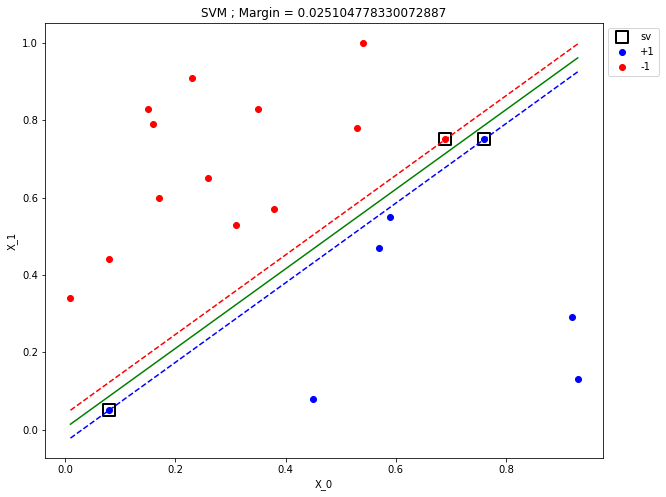

In [7]:
# Part A: Implement and apply the linear support vector machine 
# onto the given dataset to obtain the (w, b)

# Define H
H = np.zeros((x_dimension+1, x_dimension+1))
for d in range(x_dimension):
    H[d+1][d+1] = 1
H[0][0] = 0.00001

# Define Phi
Phi = np.zeros((x_dimension+1))

# Define A
A = np.zeros((sample_size, x_dimension+1))
for n in range(sample_size):
    A[n][0] = -1*y_data[n]
    for d in range(x_dimension):
        A[n][d+1] = -1*y_data[n]*x_data[d][n]

# Define c
c = np.zeros((sample_size))
for n in range(sample_size):
    c[n] = -1

# Uncomment to print H, Phi, A, c
# print(H)
# print(Phi)
# print(A)
# print(c)

# Use Quadratic Programming quadprog(H, Phi, A, c) to calculate [b w]
q = solve_qp(H, Phi, A, c)

# Get b and w from q
b = q[0]
w = np.delete(q, 0)
print()
print("Part A: " + "w = " + str(w) + "; b = " + str(b) )

# Part B: Identify the support vectors
sv = getSupportVector(w, b, x_data, y_data)
print()
print("Part B: Support Vectors: " + str(sv))

# Part C: Compute the largest margin
margin = 1/np.linalg.norm(w)
print()
print("Part C: Margin = "+str(margin))

# Part D: Visualize the training data, highlight the support vectors, 
# plot the decision boundary line and the two lines along the support vectors.
print()
print("Part D:")
Visualization(w, b, x_data, y_data, 'SVM'+" ; Margin = "+ str(margin))
